In [1]:
import math
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation : str
    result : str

In [3]:
def multiply(state: AgentState) -> AgentState:
    """Multiply the two ages in the state."""
    if state["operation"] == "+":
        state["result"] = "Hello dear, " + state["name"] + " The value is " + str(sum(state["values"]))
    elif state["operation"] == "*":
        state["result"] = "Hello dear, " + state["name"] + " The value is " + str(math.prod(state["values"]))
    else:
        state["result"] = "Invalid"
    return state


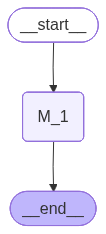

In [4]:
graph = StateGraph(AgentState)
graph.add_node("M_1", multiply)
graph.set_entry_point("M_1")
graph.set_finish_point("M_1")
app = graph.compile()
app

In [5]:
answer = app.invoke({"name": "Rahim","values": [2, 3],"operation": "+"})
answer["result"]

'Hello dear, Rahim The value is 5'

In [6]:
answer = app.invoke({"name": "Rahim","values": [2, 3],"operation": "*"})
answer["result"]

'Hello dear, Rahim The value is 6'